In [1]:
# Data analysis & wrangling
import numpy as np 
import pandas as pd 
import random as rnd
import string
import re
import pickle

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn modules
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Amazon products

In [2]:
df = pd.read_csv('/Users/Varvara/spiced_working_files/final_project/Recommender/amazon_data_medium.csv',index_col=0)
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,title,category,brand,price
0,5,3,True,"10 6, 2013",A2LSCFZM2FBZK7,0486427706,{'Format:': ' Paperback'},Ginger,The stained glass pages are pretty cool. And i...,Nice book,1381017600,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
1,5,9,True,"08 9, 2013",A3IXP5VS847GE5,0486427706,{'Format:': ' Paperback'},Dragonflies &amp; Autumn Leaves,My 11 y.o. loved this...and so do I (you know ...,Great pictures,1376006400,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
2,5,NaN,True,"04 5, 2016",A1274GG1EB2JLJ,0486427706,{'Format:': ' Paperback'},barbara ann,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave...",1459814400,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
3,5,3,True,"02 13, 2016",A30X5EGBYAZQQK,0486427706,{'Format:': ' Paperback'},Samantha,I absolutely love this book! Its translucent p...,So beautiful!,1455321600,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
4,5,NaN,True,"12 10, 2015",A3U6UNXLAUY6ZV,0486427706,{'Format:': ' Paperback'},CP in Texas,I love it!,Five Stars,1449705600,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884948,5,NaN,True,"02 25, 2018",A355AGXGH3P22A,B01HILIX6Q,NaN,Linda,my granddaughter enjoyed her docMcstuffins par...,Five Stars,1519516800,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN
1884949,1,NaN,True,"02 14, 2018",A1RZNLQZDIZ6U8,B01HILIX6Q,NaN,Tara.,The stickers were stuck to the paper. Mostly a...,Mostly ripped pictures because they weren't re...,1518566400,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN
1884950,5,NaN,True,"01 26, 2018",A1CFZTW88EV2T6,B01HILIX6Q,NaN,nakeisha barber,loveit got this for my grand daughters Doc Mcs...,Five Stars,1516924800,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN
1884951,3,NaN,True,"12 17, 2017",A21TLF141LHKBN,B01HILIX6Q,NaN,Amazon Customer,good item,Three Stars,1513468800,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN


In [3]:
df.groupby("asin")["reviewerID"].count().sort_values(ascending=False).head(10)

asin
B000YDDF6O    4887
B00WR5357G    2178
B00000K3BR    1988
B001794YO6    1956
B000ZKPOTM    1902
B001543YEY    1781
B000197NXM    1584
B00004YO0Y    1522
B000WD3XBI    1399
B0015AM26E    1341
Name: reviewerID, dtype: int64

In [4]:
df.groupby("asin")["title"].count().sort_values(ascending=False).head(10)


asin
B000YDDF6O    4887
B00WR5357G    2178
B00000K3BR    1988
B001794YO6    1956
B000ZKPOTM    1902
B001543YEY    1781
B000197NXM    1584
B00004YO0Y    1522
B000WD3XBI    1399
B0015AM26E    1341
Name: title, dtype: int64

In [5]:
# product
df['asin'].value_counts()

B000YDDF6O    4887
B00WR5357G    2178
B00000K3BR    1988
B001794YO6    1956
B000ZKPOTM    1902
              ... 
B0011GF2QO       1
B0013A8U7G       1
B000XTJJF0       1
B0013AEA4S       1
B0016L18A8       1
Name: asin, Length: 78698, dtype: int64

In [6]:
# userID
df['reviewerID'].value_counts()

AJGU56YG8G1DQ     869
A2HC9549CZAKNN    517
AVU1ILDDYW301     455
ALYZJ7W14YS26     420
A2QDOJFFLFGF18    413
                 ... 
A3P8S5UA0S583O      3
A3BU823NEZVTPO      3
AI87PWMQM95FW       3
A5ESTB4P89RQG       2
A2MV28DJV6B819      2
Name: reviewerID, Length: 208180, dtype: int64

In [7]:
# rating
df['overall'].value_counts()

5    1343696
4     280869
3     134717
1      65386
2      60285
Name: overall, dtype: int64

In [8]:
avg_rating = df.groupby("title")["overall"].mean()
df.groupby("title")["overall"].mean().sort_values(ascending=False).head(10)

title
 - London Double Decker Bus Hard Top (4.75&quot; Diecast Model Car, Red)    5.0
LEGO Mixels 41507 Zaptor Building Set                                       5.0
Baby Alive Doll Food &amp; Juice Accessory Pack                             5.0
LEGO Mixels 41534 Vampos Building Kit                                       5.0
LEGO Mixels 41526 WIZWUZ Building Kit                                       5.0
LEGO Mixels 41525 MAGNIFO Building Kit                                      5.0
LEGO Mixels 41522 SCORPI Building Kit                                       5.0
LEGO Mixels 41521 FOOTI Building Kit                                        5.0
LEGO Mixels 41506 Teslo Building Set                                        5.0
LEGO Mixels FLURR 41511 Building Kit                                        5.0
Name: overall, dtype: float64

In [9]:
df.groupby("title")["overall"].mean().sort_values().head(10)

title
LeapFrog 30606 DIDJ Star Wars Design - The Clone Wars SE (Special Edition Bundle)                                                                      1.0
FitBALL Chair -55 cm Ball and Pump                                                                                                                     1.0
Discovery Kids Motorized Pottery Wheel with Clay                                                                                                       1.0
Lil' Rider Ride On Toy Tractor and Trailer, Battery Powered Ride On Toy Ride On Toys for Boys and Girls, For 3 &ndash; 7 Year Olds (Red and Yellow)    1.0
Fishin' Buddy w/ Rechargeable Battery                                                                                                                  1.0
Revell Boeing C-17 Globemaster III                                                                                                                     1.0
Mattel Hot Wheels Car Crusher Playset with Bonus Cars           

In [10]:
avg_rating.value_counts()

5.000000    8049
4.800000    2651
4.000000    2611
4.500000    2557
4.666667    2420
            ... 
4.744589       1
3.032258       1
3.788732       1
4.622754       1
4.311798       1
Name: overall, Length: 4636, dtype: int64

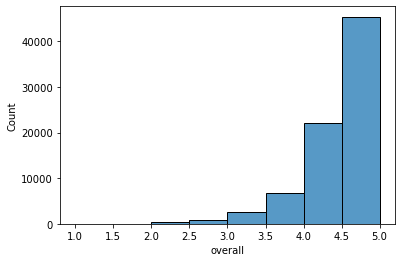

In [11]:
sns.histplot(data=avg_rating.to_frame(), x="overall", binwidth=0.5);

### Filter the products that have been rated by less than 1000 users

In [12]:
filter = df.groupby("title")["reviewerID"].count() < 1000
less_than_1000 = df.groupby("title")["reviewerID"].count()[filter].sort_values()
len(less_than_1000)

78152

In [13]:
f"{round(len(less_than_1000) / df.nunique()[3], 2)}% of the products have been rated by less then 1000 users"

'13.61% of the products have been rated by less then 1000 users'

###  Get a list of products with more than 1000 ratings

In [15]:
most_rated_products = df.groupby("title")["reviewerID"].count().sort_values(ascending=False)
more_than_1000 = most_rated_products[most_rated_products > 1000]

In [23]:
with open('/content/drive/MyDrive/more_than_1000.bin', 'wb') as f:
    pickle.dump(more_than_1000, f)

### Dataset filtering

In [8]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'title', 'category', 'brand', 'price'],
      dtype='object')

In [16]:
df['vote'].value_counts()

2.0      59728
3.0      29300
2        18841
4.0      16936
5.0      11135
         ...  
253.0        1
1,443        1
291          1
374          1
343.0        1
Name: vote, Length: 652, dtype: int64

In [17]:
vote5=df[(df.vote == 5)]
vote5

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,title,category,brand,price
32833,5,5.0,True,"06 27, 2007",A2FV7AL35XJCRL,B00000K163,NaN,C.D.King,"My 32 month old loves blowing bubbles, and wit...",Really spill proof!,1182902400,NaN,The Original Bubble Tumbler,"['Toys & Games', 'Sports & Outdoor Play', 'Bub...",Little Kids Inc.,NaN
32834,5,5.0,True,"06 27, 2007",A2FV7AL35XJCRL,B00000K163,NaN,C.D.King,"My 32 month old loves blowing bubbles, and wit...",Really spill proof!,1182902400,NaN,The Original Bubble Tumbler,"['Toys & Games', 'Sports & Outdoor Play', 'Bub...",Little Kids Inc.,NaN
32867,5,5.0,False,"05 21, 2003",A3L1MEXXDI4Q77,B00000K1Y9,{'Format:': ' Toy'},Miranda,I bought this puppet in a bookstore after I ma...,Soooo Cute!,1053475200,NaN,Folkmanis Monkey Hand Puppet,"['Toys & Games', 'Stuffed Animals & Plush Toys...",Folkmanis,$19.70
32868,5,5.0,False,"05 21, 2003",A3L1MEXXDI4Q77,B00000K1Y9,{'Format:': ' Toy'},Miranda,I bought this puppet in a bookstore after I ma...,Soooo Cute!,1053475200,NaN,Folkmanis Monkey Hand Puppet,"['Toys & Games', 'Stuffed Animals & Plush Toys...",Folkmanis,$19.70
32927,5,5.0,False,"11 15, 2001",A4IJAIG9455PT,B00000K0FY,NaN,Blah,This game is worth every cent of the price. If...,A souped up version of Risk,1005782400,NaN,"Axis &amp; Allies Board Game, 2004 Revised Edi...","['Toys & Games', 'Games', 'Board Games']",Avalon Hill,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884199,5,5.0,True,"07 28, 2016",A2MKQYN5Z2G242,B01DV8L76I,NaN,seth amos franklin,Came with everything is was supposed to. Didn'...,Bang for yo Buck!,1469664000,NaN,Pokemon XY Fates Collide Theme Deck Zygarde De...,"['Toys & Games', 'Games', 'Trading Card Games'...",Pokemon,$12.99
1884294,4,5.0,False,"08 29, 2016",A2TSJ1MHISL8Q6,B01EIKSH84,{'Style:': ' Jump Ship'},How Lou Sees It,Jump Ship is a great choose your own adventure...,Great Quality Choose Your Own Adventure for Yo...,1472428800,['https://images-na.ssl-images-amazon.com/imag...,Cardventures - Jump Ship Card Game,"['Toys & Games', 'Games', 'Card Games']",Gamewright,$11.99
1884450,4,5.0,False,"10 11, 2016",A23N60UXHIHVM1,B01F7AE9XQ,NaN,Rain W.,Yay! Another awesome Strawberry Shortcake reis...,Smells like the 80s,1476144000,NaN,The Bridge Direct Strawberry Shortcake &amp; B...,"['Toys & Games', 'Dolls & Accessories', 'Dolls']",The Bridge Direct,$19.95
1884674,4,5.0,True,"06 2, 2016",A2P216HQVIR2YX,B01G5669KW,{'Color:': ' Green'},Jerry Pham,Just got my xsoul hexblades.....not looking so...,Questionable....First impression not good,1464825600,['https://images-na.ssl-images-amazon.com/imag...,"Hex-Blades 5040 Propeller (3 Sets, 6CW, 6CCW) ...",[],XSOUL,NaN


In [18]:
vote_df=vote5[['asin','title','reviewerID','overall']]
vote_df

,asin,title,reviewerID,overall
32833,B00000K163,The Original Bubble Tumbler,A2FV7AL35XJCRL,5
32834,B00000K163,The Original Bubble Tumbler,A2FV7AL35XJCRL,5
32867,B00000K1Y9,Folkmanis Monkey Hand Puppet,A3L1MEXXDI4Q77,5
32868,B00000K1Y9,Folkmanis Monkey Hand Puppet,A3L1MEXXDI4Q77,5
32927,B00000K0FY,"Axis &amp; Allies Board Game, 2004 Revised Edi...",A4IJAIG9455PT,5
...,...,...,...,...
1884199,B01DV8L76I,Pokemon XY Fates Collide Theme Deck Zygarde De...,A2MKQYN5Z2G242,5
1884294,B01EIKSH84,Cardventures - Jump Ship Card Game,A2TSJ1MHISL8Q6,4
1884450,B01F7AE9XQ,The Bridge Direct Strawberry Shortcake &amp; B...,A23N60UXHIHVM1,4
1884674,B01G5669KW,"Hex-Blades 5040 Propeller (3 Sets, 6CW, 6CCW) ...",A2P216HQVIR2YX,4


In [19]:
unique_asin = vote_df['asin'].unique()
len(unique_asin)

8592

In [20]:
vote_df.duplicated(subset='asin').value_counts()
vote_df.drop_duplicates(subset ="asin", keep = 'first', inplace = True)
vote_df

,asin,title,reviewerID,overall
32833,B00000K163,The Original Bubble Tumbler,A2FV7AL35XJCRL,5
32867,B00000K1Y9,Folkmanis Monkey Hand Puppet,A3L1MEXXDI4Q77,5
32927,B00000K0FY,"Axis &amp; Allies Board Game, 2004 Revised Edi...",A4IJAIG9455PT,5
33039,B00000K2IO,Make Your Own Opoly Board Game,AN3RI8LIDGS9H,5
34503,B00000K3BR,"Stomp Rocket The Original Jr. Glow, 4 Rockets ...",A3KC3NPCXZ165L,5
...,...,...,...,...
1884199,B01DV8L76I,Pokemon XY Fates Collide Theme Deck Zygarde De...,A2MKQYN5Z2G242,5
1884294,B01EIKSH84,Cardventures - Jump Ship Card Game,A2TSJ1MHISL8Q6,4
1884450,B01F7AE9XQ,The Bridge Direct Strawberry Shortcake &amp; B...,A23N60UXHIHVM1,4
1884674,B01G5669KW,"Hex-Blades 5040 Propeller (3 Sets, 6CW, 6CCW) ...",A2P216HQVIR2YX,4


In [21]:
vote_df.to_csv('vote_5.csv',index=False)

In [22]:
rec_df=vote_df[['asin','title','reviewerID','overall']]
rec_df

,asin,title,reviewerID,overall
32833,B00000K163,The Original Bubble Tumbler,A2FV7AL35XJCRL,5
32867,B00000K1Y9,Folkmanis Monkey Hand Puppet,A3L1MEXXDI4Q77,5
32927,B00000K0FY,"Axis &amp; Allies Board Game, 2004 Revised Edi...",A4IJAIG9455PT,5
33039,B00000K2IO,Make Your Own Opoly Board Game,AN3RI8LIDGS9H,5
34503,B00000K3BR,"Stomp Rocket The Original Jr. Glow, 4 Rockets ...",A3KC3NPCXZ165L,5
...,...,...,...,...
1884199,B01DV8L76I,Pokemon XY Fates Collide Theme Deck Zygarde De...,A2MKQYN5Z2G242,5
1884294,B01EIKSH84,Cardventures - Jump Ship Card Game,A2TSJ1MHISL8Q6,4
1884450,B01F7AE9XQ,The Bridge Direct Strawberry Shortcake &amp; B...,A23N60UXHIHVM1,4
1884674,B01G5669KW,"Hex-Blades 5040 Propeller (3 Sets, 6CW, 6CCW) ...",A2P216HQVIR2YX,4


In [23]:
products=vote_df[['asin','title']]
products.set_index('asin')

,title
asin,
B00000K163,The Original Bubble Tumbler
B00000K1Y9,Folkmanis Monkey Hand Puppet
B00000K0FY,"Axis &amp; Allies Board Game, 2004 Revised Edi..."
B00000K2IO,Make Your Own Opoly Board Game
B00000K3BR,"Stomp Rocket The Original Jr. Glow, 4 Rockets ..."
...,...
B01DV8L76I,Pokemon XY Fates Collide Theme Deck Zygarde De...
B01EIKSH84,Cardventures - Jump Ship Card Game
B01F7AE9XQ,The Bridge Direct Strawberry Shortcake &amp; B...


In [24]:
products.to_csv('products.csv',index=False)

In [25]:
#create dictionaries
unique_products = products['title'].unique()
products_list = products['title'].tolist()
products_dict = {unique_products[i] : i for i in range(len(unique_products))}
products_title_dict={key:value for (value,key) in enumerate(products_dict)}
products_title_dict

{'The Original Bubble Tumbler': 0,
 'Folkmanis Monkey Hand Puppet': 1,
 'Axis &amp; Allies Board Game, 2004 Revised Edition': 2,
 'Make Your Own Opoly Board Game': 3,
 'Stomp Rocket The Original Jr. Glow, 4 Rockets (Packaging May Vary)': 4,
 'Hohner 6 Piece Rhythm Instrument Set': 5,
 'Plush Octopus Puppet 13&quot;': 6,
 'Folkmanis Mouse Hand Puppet, White': 7,
 'Folkmanis Snowy Owl Hand Puppet': 8,
 'Great Explorations Star Explosion': 9,
 'PlanToys Plan Dollhouse Pet and Accessories Furniture': 10,
 "Ravensburger Rivers, Roads &amp; Rails - Children's Game": 11,
 'Anatex Mini Rollercoaster': 12,
 'Ty Beanie Babies Puffer the Puffin [Toy]': 13,
 'Bicycle Poker Size Standard Index Playing Cards (2-Pack) [Colors May Vary: Red, Blue or Black]': 14,
 'Stare! Board Game - 3rd Edition': 15,
 'Gigamic Quixo Classic': 16,
 'The Original Rubber Duck Toy for the Bath': 17,
 'Holiday Barbie Special Edition Millennium Princess Mattel Year 1999 2000 with Swirl Background Inside Box': 18,
 'Jacquar

In [26]:
def get_asin_name(asin):
    vote5_df = pd.read_csv('/Users/Varvara/spiced_working_files/final_project/Recommender/vote_5.csv', index_col=0)
    product_name=vote5_df[vote5_df.index==(asin)]['title'].values[0]
    return product_name

### NMF

In [27]:
nmf_df = rec_df.pivot_table(index='reviewerID', columns='asin', values='overall')
nmf_df

asin,1933054891,B00000IZSX,B00000K0FY,B00000K163,B00000K1Y9,B00000K2IO,B00000K3BR,B00000K3PW,B00000K4EE,B00000K5CK,...,B01HFCH5Y4,B01HFGY426,B01HG1LAJA,B01HG1LLDU,B01HGHN4C0,B01HHCZ6XY,B01HHZ6JDC,B01HIS1GS6,B01HIXTHMS,B01HJFAGJI
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0748777WDXO309EABPW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0815414IQ081GR6BB0I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1004AX2J2HXGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WFKYVRPVX7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10170TS3O4C9G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZWWHYGY7IGMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZYF8KWOPYJVS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZYRH26KMARNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
nmf_df.shape

(7607, 8592)

In [29]:
nmf_df.head()

asin,1933054891,B00000IZSX,B00000K0FY,B00000K163,B00000K1Y9,B00000K2IO,B00000K3BR,B00000K3PW,B00000K4EE,B00000K5CK,...,B01HFCH5Y4,B01HFGY426,B01HG1LAJA,B01HG1LLDU,B01HGHN4C0,B01HHCZ6XY,B01HHZ6JDC,B01HIS1GS6,B01HIXTHMS,B01HJFAGJI
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0748777WDXO309EABPW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0815414IQ081GR6BB0I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1004AX2J2HXGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WFKYVRPVX7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10170TS3O4C9G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
nmf_df = nmf_df.fillna(0)

In [31]:
nmf_df.shape

(7607, 8592)

NMF Model

In [32]:
n_components=20
nmf_model = NMF(n_components=n_components)
nmf_model.fit(nmf_df)

NMF(n_components=20)

In [33]:
Q = nmf_model.components_

In [34]:
Q =  pd.DataFrame(Q, 
                 columns=nmf_df.columns, 
                 index=[f"feature_{i+1}" for i in range(n_components)])  # category matrix
Q

asin,1933054891,B00000IZSX,B00000K0FY,B00000K163,B00000K1Y9,B00000K2IO,B00000K3BR,B00000K3PW,B00000K4EE,B00000K5CK,...,B01HFCH5Y4,B01HFGY426,B01HG1LAJA,B01HG1LLDU,B01HGHN4C0,B01HHCZ6XY,B01HHZ6JDC,B01HIS1GS6,B01HIXTHMS,B01HJFAGJI
feature_1,1.324962e-42,2.940203e-55,2.923676e-55,2.966628e-55,2.952657e-55,2.924825e-55,2.940668e-55,3.642957e-114,2.950802e-55,2.939611e-55,...,2.929517e-55,2.909259e-55,3.642957e-114,2.921309e-55,1.326314e-42,2.912972e-55,2.050163e-63,2.942181e-55,6.335607e-74,2.934892e-55
feature_2,0.000000e+00,3.471596e-51,3.485331e-51,3.521320e-51,3.505779e-51,3.477109e-51,3.501438e-51,4.579200e-110,3.511925e-51,3.468735e-51,...,3.492674e-51,3.467558e-51,4.579200e-110,3.479669e-51,1.566429e-38,3.469182e-51,2.452842e-59,3.503570e-51,7.626017e-70,3.489222e-51
feature_3,2.262497e-33,4.827532e-46,4.878490e-46,4.922809e-46,4.908983e-46,4.859563e-46,4.908786e-46,3.454177e-105,4.918478e-46,4.833833e-46,...,4.892886e-46,4.842131e-46,3.454177e-105,4.867742e-46,0.000000e+00,4.859477e-46,3.369394e-54,4.895460e-46,1.012455e-64,4.870203e-46
feature_4,2.305993e-33,5.155507e-46,5.196324e-46,5.225070e-46,5.229230e-46,5.183630e-46,5.226967e-46,7.806473e-105,5.232578e-46,5.157485e-46,...,5.218408e-46,5.175168e-46,7.806473e-105,5.196300e-46,2.359767e-33,5.173809e-46,3.694338e-54,5.206504e-46,1.161562e-64,5.197957e-46
feature_5,6.441893e-30,1.442204e-42,1.459369e-42,1.463380e-42,1.465377e-42,1.445089e-42,1.466090e-42,1.300478e-101,1.471831e-42,1.441516e-42,...,1.460542e-42,1.440497e-42,1.300478e-101,1.457147e-42,6.478261e-30,1.444939e-42,1.017469e-50,1.452545e-42,3.139242e-61,1.450159e-42
feature_6,0.000000e+00,6.124542e-42,6.123583e-42,6.183783e-42,6.208104e-42,6.083381e-42,6.201613e-42,5.312008e-101,6.185273e-42,6.127130e-42,...,6.170810e-42,6.058560e-42,5.312008e-101,6.157038e-42,2.732683e-29,6.071970e-42,4.261198e-50,6.145449e-42,1.310242e-60,6.111205e-42
feature_7,6.843748e-27,5.262913e-40,2.343610e-40,5.418734e-40,2.599865e-40,5.132674e-40,2.666554e-40,0.000000e+00,2.496333e-40,2.541214e-40,...,2.574076e-40,2.322158e-40,0.000000e+00,2.395658e-40,0.000000e+00,2.371295e-40,0.000000e+00,2.523505e-40,0.000000e+00,5.195611e-40
feature_8,2.787553e-27,0.000000e+00,1.628784e-39,0.000000e+00,1.652335e-39,0.000000e+00,1.653425e-39,0.000000e+00,1.665181e-39,1.480227e-39,...,1.646728e-39,1.493377e-39,0.000000e+00,1.615305e-39,7.793107e-27,1.503877e-39,1.051880e-47,1.513706e-39,2.796622e-58,0.000000e+00
feature_9,1.993110e-25,0.000000e+00,0.000000e+00,1.470759e-37,1.533534e-37,0.000000e+00,1.520493e-37,0.000000e+00,1.562357e-37,1.390569e-37,...,1.516903e-37,0.000000e+00,0.000000e+00,0.000000e+00,4.529379e-25,1.389598e-37,8.902661e-46,1.451848e-37,2.340949e-56,0.000000e+00
feature_10,1.001852e-22,1.262222e-35,1.260087e-35,0.000000e+00,0.000000e+00,0.000000e+00,1.085062e-35,0.000000e+00,1.172796e-35,0.000000e+00,...,1.054222e-35,1.087658e-35,0.000000e+00,0.000000e+00,5.043977e-23,8.944252e-36,4.396540e-44,1.027928e-35,5.038106e-55,1.168645e-35


In [35]:
P = pd.DataFrame(nmf_model.transform(nmf_df),
             index=nmf_df.index,
            columns = [f"feature_{i+1}" for i in range(n_components)])
P

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
reviewerID,,,,,,,,,,,,,,,,,,,,
A0748777WDXO309EABPW,4.024588e-64,5.383293e-60,8.517123e-55,9.348100e-55,2.827909e-51,1.204895e-50,0.000000e+00,2.934508e-48,2.842256e-46,1.475539e-44,1.084155e-44,6.005373e-44,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,6.039943e-42
A0815414IQ081GR6BB0I,7.168175e-56,9.545915e-52,1.535618e-46,1.639644e-46,5.022522e-43,2.152625e-42,8.353276e-41,5.227932e-40,0.000000e+00,4.880179e-36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,7.325328e-34,9.779989e-34
A1004AX2J2HXGL,7.117624e-56,9.492077e-52,1.527264e-46,1.634040e-46,4.991397e-43,2.132546e-42,1.771604e-40,0.000000e+00,5.435635e-38,4.472496e-36,0.000000e+00,1.559402e-35,0.000000e+00,3.674207e-36,0.0,0.0,0.0,4.143224e-34,0.000000e+00,1.077931e-33
A100WFKYVRPVX7,7.162833e-56,9.541452e-52,1.539188e-46,1.645273e-46,5.052169e-43,2.168693e-42,8.648488e-41,5.691476e-40,5.949634e-38,4.109820e-36,4.461130e-36,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.317759e-33,2.961012e-33,0.000000e+00
A10170TS3O4C9G,9.327871e-75,1.255271e-70,1.919456e-65,2.204399e-65,6.543801e-62,2.778627e-61,0.000000e+00,5.851391e-59,5.605251e-57,1.268133e-55,0.000000e+00,3.991181e-55,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.675675e-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZWWHYGY7IGMD,9.310945e-90,1.267733e-85,1.786803e-80,2.279776e-80,6.407079e-77,2.704048e-76,0.000000e+00,2.588428e-74,2.817404e-72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.917112e-67
AZYF8KWOPYJVS,1.409922e-46,1.859608e-42,1.265969e-37,3.201076e-37,9.747948e-34,4.185450e-33,0.000000e+00,6.264484e-32,0.000000e+00,6.079473e-28,8.898895e-29,4.072516e-26,1.207220e-26,4.111526e-26,0.0,0.0,0.0,2.002518e-24,2.338674e-24,1.121685e-24
AZYRH26KMARNB,4.787999e-50,6.321571e-46,1.045197e-40,1.076903e-40,0.000000e+00,0.000000e+00,2.027999e-34,3.216382e-34,3.810415e-32,0.000000e+00,2.949085e-30,1.282050e-29,0.000000e+00,8.812006e-30,0.0,0.0,0.0,5.853302e-28,6.854530e-28,4.113734e-28


In [36]:
R_hat = pd.DataFrame(np.dot(P, Q),
                  index=nmf_df.index,
                    columns=nmf_df.columns)
R_hat 

asin,1933054891,B00000IZSX,B00000K0FY,B00000K163,B00000K1Y9,B00000K2IO,B00000K3BR,B00000K3PW,B00000K4EE,B00000K5CK,...,B01HFCH5Y4,B01HFGY426,B01HG1LAJA,B01HG1LLDU,B01HGHN4C0,B01HHCZ6XY,B01HHZ6JDC,B01HIS1GS6,B01HIXTHMS,B01HJFAGJI
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0748777WDXO309EABPW,7.712728e-63,8.738375e-75,1.859308e-79,1.540398e-74,3.026456e-78,1.304067e-74,3.819849e-78,3.436256e-133,3.101015e-79,8.841159e-75,...,2.749310e-79,1.197241e-74,3.436256e-133,4.740204e-87,2.899871e-62,1.167381e-74,1.016398e-82,1.377224e-74,3.759431e-93,1.313938e-74
A0815414IQ081GR6BB0I,1.267504e-54,1.414966e-66,6.149452e-71,2.493748e-66,4.868450e-66,3.283360e-66,5.295295e-71,5.564051e-125,5.723456e-71,1.431577e-66,...,5.144790e-71,2.621966e-66,5.564051e-125,5.156973e-66,1.373964e-53,2.409610e-66,1.645606e-74,2.230036e-66,6.087203e-85,3.276427e-66
A1004AX2J2HXGL,2.566080e-54,1.559535e-66,5.635736e-71,2.749861e-66,7.511509e-70,2.327505e-66,1.234715e-66,6.132584e-125,5.246177e-71,1.577855e-66,...,1.204977e-66,2.457751e-66,6.132584e-125,4.245543e-80,8.466272e-54,2.388690e-66,1.814022e-74,2.458289e-66,6.709429e-85,2.344967e-66
A100WFKYVRPVX7,3.862069e-54,5.187506e-71,5.178733e-71,8.750524e-75,1.967909e-65,4.737962e-66,3.924058e-66,1.217714e-142,1.045851e-70,8.274238e-75,...,3.832391e-66,3.783330e-66,1.217714e-142,2.084529e-65,4.703335e-53,3.070318e-66,3.244713e-79,8.348486e-71,2.071964e-90,4.643862e-66
A10170TS3O4C9G,2.136540e-73,2.424272e-85,1.597959e-90,4.272918e-85,1.922583e-89,3.617451e-85,2.485293e-89,9.533285e-144,1.488138e-90,2.452823e-85,...,1.337744e-90,3.321503e-85,9.533285e-144,9.451961e-98,8.039197e-73,3.238642e-85,2.819573e-93,3.820807e-85,1.042966e-103,3.645254e-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZWWHYGY7IGMD,2.443265e-88,2.773551e-100,4.216166e-113,4.888344e-100,4.321014e-109,4.138503e-100,4.284271e-109,1.090687e-158,4.402222e-109,2.806234e-100,...,4.274156e-109,3.800061e-100,1.090687e-158,4.181277e-113,9.195417e-88,3.705264e-100,3.225741e-108,4.371307e-100,1.193233e-118,4.170458e-100
AZYF8KWOPYJVS,7.254216e-45,1.622787e-57,9.283704e-62,2.868336e-57,1.554491e-56,6.165005e-57,5.965406e-57,6.381514e-116,8.254551e-63,1.641902e-57,...,5.823716e-57,5.956731e-57,6.381514e-116,1.646408e-56,5.018795e-44,5.301771e-57,1.888066e-65,2.562066e-57,6.982131e-76,6.107893e-57
AZYRH26KMARNB,2.226317e-48,5.951477e-61,5.714076e-73,1.050818e-60,4.556209e-60,1.985301e-60,1.743757e-60,2.340394e-119,3.727399e-65,6.021609e-61,...,1.702286e-60,1.908401e-60,2.340394e-119,4.825535e-60,1.509305e-47,1.712413e-60,6.924119e-69,9.389741e-61,2.560634e-79,1.969905e-60


In [37]:
nmf_model.reconstruction_err_

397.5361670758523

In [38]:
filename = "my_nmf_model.sav"
pickle.dump(nmf_model,open(filename, "wb"))
pickle.dump(nmf_df, open('nmf_dataframe.sav', "wb"))
pickle.dump(Q, open('Q_df.sav', 'wb'))

New recommendations

In [39]:
query = {'B01HFCH5Y4': 5, 
         'B00000K3BR': 1, 
         'B01HG1LAJA': 1, 
         'B01HGHN4C0':1, 
         '1933054891':1}

In [40]:
user_dataframe = pd.DataFrame(query, index=[
                                  'Recommendation'], columns=nmf_df.columns)

In [41]:
#make a copy
user_dataframe_copy = user_dataframe.copy()

In [42]:
user_R = user_dataframe.fillna(0)
user_R

asin,1933054891,B00000IZSX,B00000K0FY,B00000K163,B00000K1Y9,B00000K2IO,B00000K3BR,B00000K3PW,B00000K4EE,B00000K5CK,...,B01HFCH5Y4,B01HFGY426,B01HG1LAJA,B01HG1LLDU,B01HGHN4C0,B01HHCZ6XY,B01HHZ6JDC,B01HIS1GS6,B01HIXTHMS,B01HJFAGJI
Recommendation,1,0,0,0,0,0,1,0,0,0,...,5,0,1,0,1,0,0,0,0,0


In [43]:
user_P = nmf_model.transform(user_R)
user_P

array([[1.30115198e-43, 8.59467201e-40, 1.42977965e-34, 2.95154291e-34,
        8.97742262e-31, 1.93173213e-30, 4.82339804e-28, 7.37956106e-28,
        5.20593100e-26, 1.26379842e-23, 1.32565641e-23, 5.63435676e-23,
        1.40319745e-23, 3.43943226e-23, 1.12467894e-21, 0.00000000e+00,
        0.00000000e+00, 1.27566631e-21, 1.13071766e-21, 5.44762508e-22]])

In [44]:
user_R = np.dot(user_P, Q)

In [45]:
rec_df = pd.DataFrame(
        user_R, index=['Recommendation'], columns=user_dataframe.columns)

rec_df

asin,1933054891,B00000IZSX,B00000K0FY,B00000K163,B00000K1Y9,B00000K2IO,B00000K3BR,B00000K3PW,B00000K4EE,B00000K5CK,...,B01HFCH5Y4,B01HFGY426,B01HG1LAJA,B01HG1LLDU,B01HGHN4C0,B01HHCZ6XY,B01HHZ6JDC,B01HIS1GS6,B01HIXTHMS,B01HJFAGJI
Recommendation,1.925966e-41,7.882858e-55,7.707514e-56,1.397193e-54,7.739608e-54,2.987280e-54,3.802226e-54,3.099274e-113,3.157512e-58,7.974135e-55,...,3.710163e-54,3.123233e-54,3.099274e-113,7.960162e-54,2.673867e-41,2.794936e-54,9.177018e-63,1.703479e-54,3.391600e-73,2.958543e-54


In [46]:
df4=rec_df.T.sort_values(by="Recommendation", ascending=False)
sorted_recommendations = df4.index.sort_values(ascending=False)
sorted_recommendations_df = sorted_recommendations.to_frame()
sorted_recommendations_df=pd.DataFrame(sorted_recommendations_df)
sorted_recommendations_df_list = list(sorted_recommendations_df.index)
recom_short = sorted_recommendations_df_list[:10]
recom_short

['B01HJFAGJI',
 'B01HIXTHMS',
 'B01HIS1GS6',
 'B01HHZ6JDC',
 'B01HHCZ6XY',
 'B01HGHN4C0',
 'B01HG1LLDU',
 'B01HG1LAJA',
 'B01HFGY426',
 'B01HFCH5Y4']

In [47]:
df2=user_dataframe_copy.T
rated_asin=df2[df2.Recommendation.isna()== False]
rated_asin

,Recommendation
asin,
1933054891,1
B00000K3BR,1
B01HFCH5Y4,5
B01HG1LAJA,1
B01HGHN4C0,1


In [48]:
sorted_new_user_df = rated_asin.index.sort_values(ascending=False)
sorted_new_user_df = sorted_new_user_df.to_frame()
sorted_new_user_df= pd.DataFrame(sorted_new_user_df)
sorted_new_user_df_list = list(sorted_new_user_df.index)
sorted_new_user_df_list   

['B01HGHN4C0', 'B01HG1LAJA', 'B01HFCH5Y4', 'B00000K3BR', '1933054891']

In [50]:
final_rec = [asin for asin in recom_short if asin not in sorted_new_user_df_list]
final_rec

['B01HJFAGJI',
 'B01HIXTHMS',
 'B01HIS1GS6',
 'B01HHZ6JDC',
 'B01HHCZ6XY',
 'B01HG1LLDU',
 'B01HFGY426']

In [53]:
recommendations = []
for asin in final_rec:
    product_title = get_asin_name(asin)
    recommendations.append(product_title)
    recommendations_df = pd.DataFrame(recommendations)
    print(recommendations_df)

                                                   0
0  Lewo Wooden Baby Toddler Toys Circle First Bea...
                                                   0
0  Lewo Wooden Baby Toddler Toys Circle First Bea...
1                    Unicorns Animals (2-Pack of 12)
                                                   0
0  Lewo Wooden Baby Toddler Toys Circle First Bea...
1                    Unicorns Animals (2-Pack of 12)
2  USA Toyz Play Kitchen Set &ndash; Hape Kitchen...
                                                   0
0  Lewo Wooden Baby Toddler Toys Circle First Bea...
1                    Unicorns Animals (2-Pack of 12)
2  USA Toyz Play Kitchen Set &ndash; Hape Kitchen...
3  EnderToys Pink Dress Green Eyed Girl Action Fi...
                                                   0
0  Lewo Wooden Baby Toddler Toys Circle First Bea...
1                    Unicorns Animals (2-Pack of 12)
2  USA Toyz Play Kitchen Set &ndash; Hape Kitchen...
3  EnderToys Pink Dress Green Eyed Girl Action

In [54]:
recommendations_df

,0
0,Lewo Wooden Baby Toddler Toys Circle First Bea...
1,Unicorns Animals (2-Pack of 12)
2,USA Toyz Play Kitchen Set &ndash; Hape Kitchen...
3,EnderToys Pink Dress Green Eyed Girl Action Fi...
4,Giant Pool Inflatable Basketball Hoop Set 2 Ba...
5,Skip Hop Baby Infant and Toddler Camping Cubs ...
6,Magna-Tiles 2-Piece Car Expansion Set &ndash; ...
